#  Классификация текстов с использованием эмбеддингов слов.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://rusvectores.org/
* https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
* https://github.com/natasha/navec
* https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html
* https://torchmetrics.readthedocs.io/en/stable/

## Задачи для совместного разбора

1\. Реализуйте модель для классификации текстов с использованием слоя `nn.Embedding`. Заморозьте веса слоя эмбеддингов.

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
batch_size = 16
seq_len = 20
vocab_size = 1000

X = th.randint(0, vocab_size, size=(batch_size, seq_len)) # b x s
y = th.randint(0, 2, size=(batch_size, ))

In [ ]:
class Net(nn.Module):
  def __init__(self,
      num_embeddings: int,
      embedding_dim: int,
      num_classes: int
  ) -> None:
    super().__init__()
    self.embedding = nn.Embedding(
        num_embeddings=num_embeddings,
        embedding_dim=embedding_dim,
        padding_idx=0,
    )
    self.fc = nn.Linear(embedding_dim, num_classes)

  def forward(self, X):
    # X: b x s
    token_embeddings = self.embedding(X) # b x s x e
    doc_embeddings = token_embeddings.mean(dim=1) # b x e
    logits = self.fc(doc_embeddings) # b x c
    return logits


In [ ]:
model = Net(num_embeddings=vocab_size, embedding_dim=32, num_classes=2)
model(X).shape

torch.Size([16, 2])

In [ ]:
criterion = nn.CrossEntropyLoss()
loss = criterion(model(X), y)
loss

tensor(0.7267, grad_fn=<NllLossBackward0>)

In [ ]:
model.embedding.weight.requires_grad_(False)

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-1.2534,  0.0383,  0.6703,  ..., -0.3205, -0.4614,  0.8759],
        [-0.3310,  0.3145,  1.4443,  ..., -0.4774, -0.4153,  0.0545],
        ...,
        [-0.2736, -1.0726, -0.6591,  ..., -0.8414, -0.2315, -0.1509],
        [ 0.3751, -0.6465,  0.6999,  ...,  0.4126, -0.5082,  1.3260],
        [ 0.9699,  1.1301, -0.3828,  ..., -0.1455,  0.5033, -1.4997]])

## Задачи для самостоятельного решения

### 1.

<p class="task" id="1"></p>

1\. Считайте файл `lenta_news.csv` и разбейте на обучающую и тестовую выборку. Выполните предобработку текста и создайте Tokenizer на основе обучающей выборки (токен - слово). Выведите на экран количество токенов в полученном словаре. Обратите внимание, что построение словаря токенов должно производиться исключительно на основе обучающей выборки.

- [x] Проверено на семинаре

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('lenta_news.csv')
df

,title,text,topic
0,МВД создало бюро по борьбе с отмыванием денег,В МВД России создано оперативно-розыскное бюро...,Экономика
1,Правительство не будет занимать деньги у ЦБ,Правительство не будет прибегать к заимствован...,Экономика
2,"ВВС США заказали 60 ""Боингов"" для вторжения в ...",Компания Boeing получит пятилетний контракт на...,Экономика
3,Правительственная комиссия не дала ExxonMobil ...,Результаты конкурса на право освоения месторож...,Экономика
4,Неимущим для получения пособия придется расста...,В доходах малоимущих россиян будут учитываться...,Экономика
...,...,...,...
23944,"Борис Гребенщиков награжден орденом ""За заслуг...","Лидер легендарной группы ""Аквариум"" Борис Греб...",Культура
23945,Мадонна и Траволта названы худшими актерами года,"24 марта, накануне вручения премии Американско...",Культура
23946,Габриэль Гарсиа Маркес простил Голливуд ради д...,Габриэль Гарсиа Маркес,Культура
23947,Аль Пачино отстоял в суде свое право на детей,Знаменитый американский актер Аль Пачино добил...,Культура


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
import re

def preprocess(text):
    text = text.lower()
    # оставляем только буквы и пробелы
    text = re.sub(r'[^а-яА-Я\s]', '', text)
    return text

train_df['text'] = train_df['text'].apply(preprocess)
test_df['text'] = test_df['text'].apply(preprocess)

In [ ]:
pd.DataFrame(data = (df['text'], train_df['text']))

,0,1,2,3,4,5,6,7,8,9,...,23939,23940,23941,23942,23943,23944,23945,23946,23947,23948
text,В МВД России создано оперативно-розыскное бюро...,Правительство не будет прибегать к заимствован...,Компания Boeing получит пятилетний контракт на...,Результаты конкурса на право освоения месторож...,В доходах малоимущих россиян будут учитываться...,"В Москву прибыла миссия Всемирного банка, кото...",Украина ввела антидемпинговую пошлину в размер...,"Миноритарные акционеры Сбербанка России, котор...",В четверг после двухдневного перерыва возобнов...,Никаких исключительных условий к России при вс...,...,На заседании ЮНЕСКО в Париже названы первые 19...,1 декабря - дата мировой премьеры заключительн...,В Торонто закончился 25-ый Международный Киноф...,Агенты знаменитого британского актера Шона Кон...,"Турецкая полиция обнаружила картину, предполож...","Лидер легендарной группы ""Аквариум"" Борис Греб...","24 марта, накануне вручения премии Американско...",Габриэль Гарсиа Маркес,Знаменитый американский актер Аль Пачино добил...,Мосгорсуд отменил решение Пресненского межмуни...
text,в мвд россии создано оперативнорозыскное бюро ...,правительство не будет прибегать к заимствован...,компания получит пятилетний контракт на сумму...,результаты конкурса на право освоения месторож...,в доходах малоимущих россиян будут учитываться...,в москву прибыла миссия всемирного банка котор...,украина ввела антидемпинговую пошлину в размер...,миноритарные акционеры сбербанка россии которы...,в четверг после двухдневного перерыва возобнов...,никаких исключительных условий к россии при вс...,...,на заседании юнеско в париже названы первые п...,декабря дата мировой премьеры заключительной...,в торонто закончился ый международный кинофест...,агенты знаменитого британского актера шона кон...,турецкая полиция обнаружила картину предположи...,лидер легендарной группы аквариум борис гребен...,марта накануне вручения премии американской к...,габриэль гарсиа маркес,знаменитый американский актер аль пачино добил...,NaN


In [ ]:
from collections import Counter

def create_tokenizer(texts):
    token_counter = Counter()
    for text in texts:
        tokens = text.split()
        token_counter.update(tokens)
    return token_counter

token_counter = create_tokenizer(train_df['text'])
len(token_counter)

172123

In [ ]:
token_counter

Counter({'знаменитый': 373,
         'итальянский': 158,
         'модельер': 11,
         'русская': 111,
         'княгиня': 8,
         'ирина': 184,
         'борисовна': 2,
         'голицына': 4,
         'представила': 74,
         'в': 146646,
         'среду': 1343,
         'московском': 335,
         'музее': 183,
         'пушкина': 66,
         'автобиографическую': 3,
         'книгу': 183,
         'из': 15300,
         'россии': 8645,
         'россию': 489,
         'книга': 223,
         'вышла': 354,
         'издательстве': 32,
         'международные': 85,
         'отношения': 375,
         'и': 74832,
         'как': 15668,
         'сказала': 286,
         'на': 64040,
         'презентации': 50,
         'сама': 305,
         'автор': 359,
         'полиграфическое': 1,
         'качество': 106,
         'книги': 430,
         'выше': 314,
         'всяческих': 2,
         'похвал': 6,
         'я': 3465,
         'почувствовала': 5,
         'что': 32631,
    

### 2.

<p class="task" id="2"></p>


2\. Создайте класс `NewsDataset`. Реализуйте метод `__getitem__` таким образом, чтобы он возвращал набор индексов токенов для текста новости $i$ и метку класса для этой новости. Сделайте длины наборов индексов одинаковой фиксированной длины (подходящее значение определите сами). Закодируйте целыми числами категории новостей. Создайте два объекта класса `NewsDataset` (для обучающей и тестовой выборки).

Выведите на экран результат выполнения `train_dataset[0]`

- [ ] Проверено на семинаре

In [ ]:
df['topic'].nunique()

4

In [ ]:
df['topic'].unique()

array(['Экономика', 'Интернет и СМИ', 'Спорт', 'Культура'], dtype=object)

In [ ]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
import torch

class NewsDataset:
  def __init__(self, texts, labels, token2idx, label2idx, max_seq_len):
    self.texts = texts
    self.labels = labels
    self.token2idx = token2idx
    self.label2idx = label2idx
    self.max_seq_len = max_seq_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = self.texts[idx]
    label = self.labels[idx]

    tokens = text.split()
    idxs = [self.token2idx.get(t, 0) for t in tokens]  # pad=0

    if len(idxs) > self.max_seq_len:
      idxs = idxs[:self.max_seq_len]
    else:
      idxs += [0]*(self.max_seq_len - len(idxs))  # padding

    label_idx = self.label2idx[label]

    return torch.tensor(idxs), torch.tensor(label_idx)

In [ ]:
def encoding(labels):
  unique_labels = list(set(labels))
  label2idx = {label: idx for idx, label in enumerate(unique_labels)}
  return label2idx

label2idx = encoding(train_df['topic'])

In [ ]:
token2idx = {token: idx+1 for idx, token in enumerate(token_counter.keys())} # +1 для резервирования 0 под паддинг

In [ ]:
label2idx

{'Экономика': 0, 'Спорт': 1, 'Культура': 2, 'Интернет и СМИ': 3}

In [ ]:
df['text'].apply(len).max()

8494

In [ ]:
df['text'].apply(len).mean()

1280.1814689548623

In [ ]:
max_seq_len = 500

train_dataset = NewsDataset(train_df['text'], train_df['topic'], token2idx, label2idx, max_seq_len)
test_dataset = NewsDataset(test_df['text'], test_df['topic'], token2idx, label2idx, max_seq_len)

In [ ]:
train_dataset[0]

(tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  10,  12,  13,
          14,  15,  16,  17,  18,  10,  19,  20,  21,  10,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
          40,  41,  42,  43,  44,  45,  28,  29,   6,   8,  46,  26,  47,  48,
          10,  49,  50,  51,  52,   6,   8,  53,  10,  54,  10,  55,  25,  56,
          19,  10,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  10,  81,
          82,  83,  84,  85,  86,  87,  88,  10,  89,  90,  91,  44,  92,  93,
          25,  94,  95,  96,  10,  97,  98,  99, 100, 101, 102,   4,   5,  10,
         103, 104, 105, 106, 107, 108, 109, 110,  28, 111, 112,  10, 113,  10,
         114, 115, 116, 117, 118,  26, 119, 120, 121,  10,  54,   6,   8,   9,
         122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
         136,  25, 137, 138,   0,   0,   0,   0,   0

### 3.

<p class="task" id="3"></p>

3\. Реализуйте модель, которая получает на вход батч новостей (в виде индексов токенов), пропускает его через слой `nn.Embedding` (матрица эмбеддингов инициализируется случайным образом), после чего передает полученные эмбеддинги части-классификатору (который состоит из некоторого количества полносвязных слоев). Для получения эмбеддинга для новости на основе эмбеддингов слов воспользуйтесь любой функцией агрегации, сохраняющей размерности векторов (сумма, усреднение и т.д.).

Решите задачу классификации новостей. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики f1 на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран отчет по классификации на обучающем и тестовом множестве.

- [ ] Проверено на семинаре

In [ ]:
import torch.nn as nn

class NewsClassifier(nn.Module):
  def __init__(self, vocab_size, embedding_dim, num_classes):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size+1, embedding_dim, padding_idx=0)
    self.classifier = nn.Sequential(
        nn.Linear(embedding_dim, 128),
        nn.ReLU(),
        nn.Linear(128, num_classes)
    )

  def forward(self, x):
    # X: b x s
    embeddings = self.embedding(x)  # b x s x e
    doc_embeddings = embeddings.mean(dim=1) # b x e
    logits = self.classifier(doc_embeddings) # b x c
    return logits

In [ ]:
vocab_size = len(token2idx)
embedding_dim = 100
num_classes = len(label2idx)

model = NewsClassifier(vocab_size, embedding_dim, num_classes)

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score
import time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

crit = nn.CrossEntropyLoss()
optim = optim.Adam(model.parameters(), lr = 0.001)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size)

In [ ]:
num_epochs = 15
train_losses = []
test_losses = []
train_f1s = []
test_f1s = []

start_train = time.time()
for epoch in range(num_epochs):
  model.train()
  epoch_train_loss = 0
  all_train_preds = []
  all_train_labels = []

  for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    optim.zero_grad()
    outputs = model(inputs)
    loss = crit(outputs, labels)
    loss.backward()
    optim.step()

    epoch_train_loss += loss.item()
    preds = torch.argmax(outputs, dim=1)
    all_train_preds.extend(preds.cpu().numpy())
    all_train_labels.extend(labels.cpu().numpy())

  avg_train_loss = epoch_train_loss / len(train_loader)
  train_f1 = f1_score(all_train_labels, all_train_preds, average='macro')

  model.eval()
  epoch_test_loss = 0
  all_test_preds = []
  all_test_labels = []

  with torch.no_grad():
      for inputs, labels in test_loader:
          inputs, labels = inputs.to(device), labels.to(device)

          outputs = model(inputs)
          loss = criterion(outputs, labels)

          epoch_test_loss += loss.item()
          preds = torch.argmax(outputs, dim=1)
          all_test_preds.extend(preds.cpu().numpy())
          all_test_labels.extend(labels.cpu().numpy())

  avg_test_loss = epoch_test_loss / len(test_loader)
  test_f1 = f1_score(all_test_labels, all_test_preds, average='macro')

  train_losses.append(avg_train_loss)
  test_losses.append(avg_test_loss)
  train_f1s.append(train_f1)
  test_f1s.append(test_f1)

  print(f'Epoch {epoch+1}/{num_epochs}')
  print(f'train loss: {avg_train_loss:.4f} | train f1: {train_f1:.4f}')
  print(f'test loss: {avg_test_loss:.4f} | test f1: {test_f1:.4f}')

first_train_time = time.time() - start_train
print(f"\nВремя обучения: {first_train_time:.2f} сек")

Epoch 1/15
train loss: 0.6886 | train f1: 0.7513
test loss: 0.2956 | test f1: 0.8968
Epoch 2/15
train loss: 0.1780 | train f1: 0.9433
test loss: 0.1915 | test f1: 0.9367
Epoch 3/15
train loss: 0.0796 | train f1: 0.9775
test loss: 0.1644 | test f1: 0.9442
Epoch 4/15
train loss: 0.0360 | train f1: 0.9922
test loss: 0.1595 | test f1: 0.9493
Epoch 5/15
train loss: 0.0167 | train f1: 0.9971
test loss: 0.1590 | test f1: 0.9504
Epoch 6/15
train loss: 0.0084 | train f1: 0.9987
test loss: 0.1643 | test f1: 0.9510
Epoch 7/15
train loss: 0.0052 | train f1: 0.9991
test loss: 0.1700 | test f1: 0.9523
Epoch 8/15
train loss: 0.0037 | train f1: 0.9992
test loss: 0.1763 | test f1: 0.9540
Epoch 9/15
train loss: 0.0029 | train f1: 0.9993
test loss: 0.1835 | test f1: 0.9531
Epoch 10/15
train loss: 0.0024 | train f1: 0.9993
test loss: 0.1900 | test f1: 0.9533
Epoch 11/15
train loss: 0.0022 | train f1: 0.9994
test loss: 0.1990 | test f1: 0.9541
Epoch 12/15
train loss: 0.0020 | train f1: 0.9992
test loss: 0.

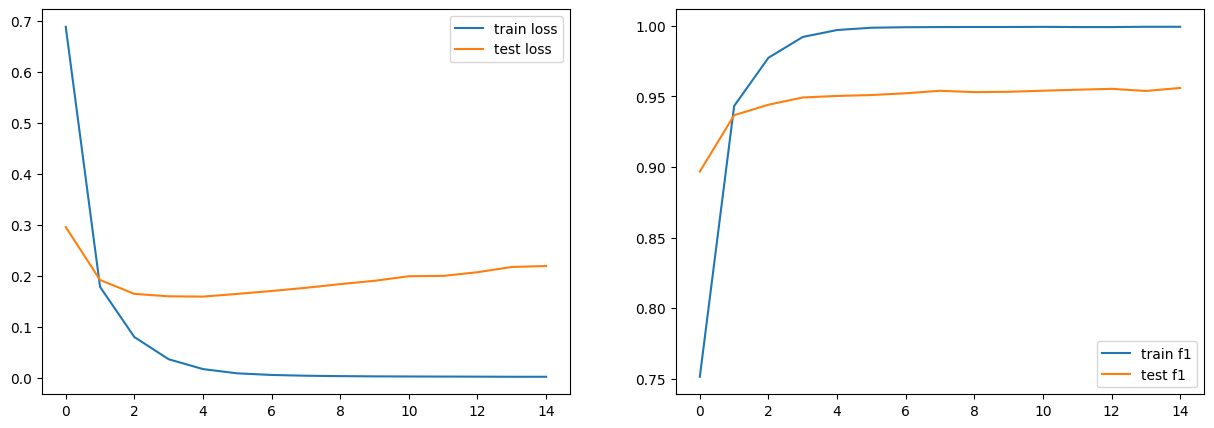

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_f1s, label='train f1')
plt.plot(test_f1s, label='test f1')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

model.eval()
all_test_preds = []
all_test_labels = []

with torch.no_grad():
  for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    preds = torch.argmax(outputs, dim=1)
    all_test_preds.extend(preds.cpu().numpy())
    all_test_labels.extend(labels.cpu().numpy())

class_names = list(label2idx.keys())

print(classification_report(all_test_labels, all_test_preds, target_names=class_names,digits=4))

                precision    recall  f1-score   support

         Спорт     0.9867    0.9834    0.9851      1208
Интернет и СМИ     0.9304    0.9242    0.9273      1187
      Культура     0.9613    0.9637    0.9625      1186
     Экономика     0.9458    0.9529    0.9493      1209

      accuracy                         0.9562      4790
     macro avg     0.9561    0.9561    0.9561      4790
  weighted avg     0.9562    0.9562    0.9562      4790



In [ ]:
all_train_preds = []
all_train_labels = []

with torch.no_grad():
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

print('для train:')
print(classification_report(all_train_labels, all_train_preds, target_names=class_names,digits=4))

для train:
                precision    recall  f1-score   support

         Спорт     1.0000    1.0000    1.0000      4792
Интернет и СМИ     0.9981    0.9998    0.9990      4762
      Культура     1.0000    0.9992    0.9996      4814
     Экономика     0.9996    0.9987    0.9992      4791

      accuracy                         0.9994     19159
     macro avg     0.9994    0.9994    0.9994     19159
  weighted avg     0.9994    0.9994    0.9994     19159



### 4.

<p class="task" id="4"></p>

4\. Повторите решение задачи 3, создав слой `nn.Embedding` на основе предобученных векторов для слов русского языка и заморозив веса данного слоя. Для поиска векторов можете воспользоваться любым известным вам ресурсом. Сравните качество полученного решения и решения из предыдущей задачи, а также время, затраченное на обучения моделей.  

- [ ] Проверено на семинаре

In [ ]:
#!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
#!pip install numpy==1.24.4  pyyaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 102.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.


In [ ]:
import gensim.downloader as api
import numpy as np
from tqdm import tqdm
import time

word_vectors = api.load("fasttext-wiki-news-subwords-300")

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
len(token2idx)

172123

In [ ]:
embedding_dim = 300
vocab_size = len(token2idx)
embed_matrix = np.zeros((vocab_size+1, embedding_dim)) # +1 для padding

found = 0
for token, idx in tqdm(token2idx.items()):
  try:
    embed_matrix[idx] = word_vectors[token]
    found+=1
  except:
    # если слова нет в фастт то 0 вектор
    pass

100%|██████████| 172123/172123 [00:00<00:00, 176121.43it/s]


In [ ]:
found

2190

In [ ]:
embed_matrix.shape

(172124, 300)

In [ ]:
import torch.nn as nn

class PretrainedClassifier(nn.Module):
  def __init__(self, embed_matrix, num_classes):
    super().__init__()
    vocab_size, embedding_dim = embed_matrix.shape

    self.embedding = nn.Embedding.from_pretrained(
        torch.FloatTensor(embed_matrix),
        freeze = True, # замораживаем
        padding_idx=0
    )
    self.classifier = nn.Sequential(
        nn.Linear(embedding_dim, 128),
        nn.ReLU(),
        nn.Linear(128, num_classes))

  def forward(self, x):
    embeddings = self.embedding(x)
    doc_embeddings = embeddings.mean(dim=1)
    logits = self.classifier(doc_embeddings)
    return logits

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score

num_classes = len(label2idx)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_p = PretrainedClassifier(embed_matrix, num_classes).to(device)

crit = nn.CrossEntropyLoss()
optim = optim.Adam(model_p.parameters(), lr = 0.01)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size)

In [ ]:
num_epochs = 15
p_train_losses = []
p_test_losses = []
p_train_f1s = []
p_test_f1s = []

start_train = time.time()

for epoch in range(num_epochs):
  model_p.train()
  epoch_train_loss = 0
  all_train_preds = []
  all_train_labels = []

  for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    optim.zero_grad()
    outputs = model_p(inputs)
    loss = crit(outputs, labels)
    loss.backward()
    optim.step()

    epoch_train_loss += loss.item()
    preds = torch.argmax(outputs, dim=1)
    all_train_preds.extend(preds.cpu().numpy())
    all_train_labels.extend(labels.cpu().numpy())

  avg_train_loss = epoch_train_loss / len(train_loader)
  train_f1 = f1_score(all_train_labels, all_train_preds, average='macro')

  model_p.eval()
  epoch_test_loss = 0
  all_test_preds = []
  all_test_labels = []

  with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_p(inputs)
        loss = crit(outputs, labels)
        epoch_test_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        all_test_preds.extend(preds.cpu().numpy())
        all_test_labels.extend(labels.cpu().numpy())

  avg_test_loss = epoch_test_loss / len(test_loader)
  test_f1 = f1_score(all_test_labels, all_test_preds, average='macro')

  p_train_losses.append(avg_train_loss)
  p_test_losses.append(avg_test_loss)
  p_train_f1s.append(train_f1)
  p_test_f1s.append(test_f1)


  print(f'Epoch {epoch+1}/{num_epochs}')
  print(f'train loss: {avg_train_loss:.4f} | train f1: {train_f1:.4f}')
  print(f'test loss: {avg_test_loss:.4f} | test f1: {test_f1:.4f}')

p_train_time = time.time() - start_train
print(f"\nВремя обучения: {p_train_time:.2f} сек")

Epoch 1/15
train loss: 1.3110 | train f1: 0.3720
test loss: 1.2181 | test f1: 0.4504
Epoch 2/15
train loss: 1.1708 | train f1: 0.4834
test loss: 1.1247 | test f1: 0.5208
Epoch 3/15
train loss: 1.0893 | train f1: 0.5253
test loss: 1.0701 | test f1: 0.5440
Epoch 4/15
train loss: 1.0367 | train f1: 0.5567
test loss: 1.0135 | test f1: 0.5593
Epoch 5/15
train loss: 0.9968 | train f1: 0.5758
test loss: 0.9786 | test f1: 0.5876
Epoch 6/15
train loss: 0.9635 | train f1: 0.5899
test loss: 0.9461 | test f1: 0.5896
Epoch 7/15
train loss: 0.9371 | train f1: 0.6025
test loss: 0.9612 | test f1: 0.5876
Epoch 8/15
train loss: 0.9243 | train f1: 0.6075
test loss: 0.9574 | test f1: 0.5950
Epoch 9/15
train loss: 0.9046 | train f1: 0.6185
test loss: 0.9705 | test f1: 0.5721
Epoch 10/15
train loss: 0.8876 | train f1: 0.6255
test loss: 0.9417 | test f1: 0.6022
Epoch 11/15
train loss: 0.8714 | train f1: 0.6375
test loss: 0.8990 | test f1: 0.6226
Epoch 12/15
train loss: 0.8615 | train f1: 0.6411
test loss: 0.

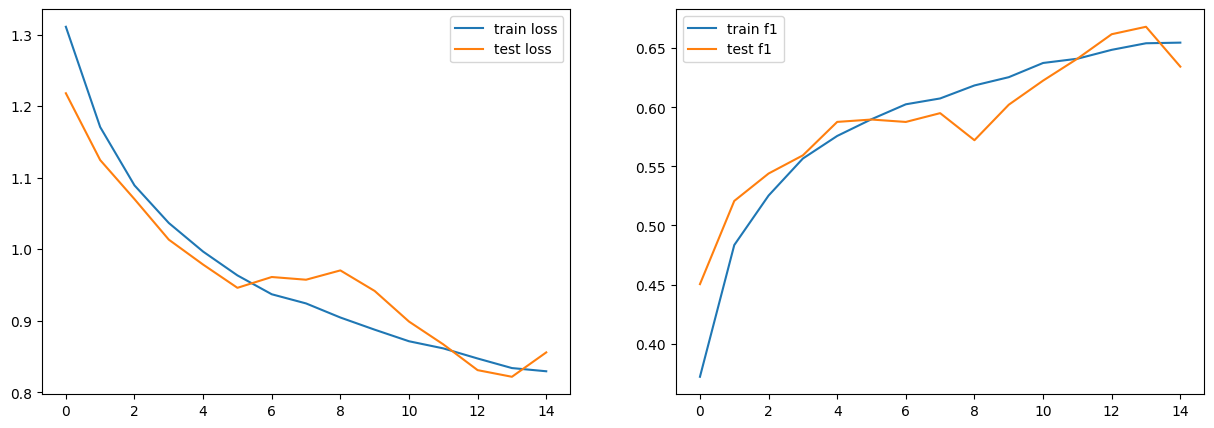

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(p_train_losses, label='train loss')
plt.plot(p_test_losses, label='test loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(p_train_f1s, label='train f1')
plt.plot(p_test_f1s, label='test f1')
plt.legend()
plt.show()

In [ ]:
# batch_size=64:

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score

num_classes = len(label2idx)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_p = PretrainedClassifier(embed_matrix, num_classes).to(device)
#model_p.resize_token_embeddings(num_classes)

crit = nn.CrossEntropyLoss()
optim = optim.Adam(model_p.parameters(), lr = 0.01)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size)

In [ ]:
num_epochs = 15
p_train_losses = []
p_test_losses = []
p_train_f1s = []
p_test_f1s = []

start_train = time.time()

for epoch in range(num_epochs):
  model_p.train()
  epoch_train_loss = 0
  all_train_preds = []
  all_train_labels = []

  for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    optim.zero_grad()
    outputs = model_p(inputs)
    loss = crit(outputs, labels)
    loss.backward()
    optim.step()

    epoch_train_loss += loss.item()
    preds = torch.argmax(outputs, dim=1)
    all_train_preds.extend(preds.cpu().numpy())
    all_train_labels.extend(labels.cpu().numpy())

  avg_train_loss = epoch_train_loss / len(train_loader)
  train_f1 = f1_score(all_train_labels, all_train_preds, average='macro')

  model_p.eval()
  epoch_test_loss = 0
  all_test_preds = []
  all_test_labels = []

  with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_p(inputs)
        loss = crit(outputs, labels)
        epoch_test_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        all_test_preds.extend(preds.cpu().numpy())
        all_test_labels.extend(labels.cpu().numpy())

  avg_test_loss = epoch_test_loss / len(test_loader)
  test_f1 = f1_score(all_test_labels, all_test_preds, average='macro')

  p_train_losses.append(avg_train_loss)
  p_test_losses.append(avg_test_loss)
  p_train_f1s.append(train_f1)
  p_test_f1s.append(test_f1)


  print(f'Epoch {epoch+1}/{num_epochs}')
  print(f'train loss: {avg_train_loss:.4f} | train f1: {train_f1:.4f}')
  print(f'test loss: {avg_test_loss:.4f} | test f1: {test_f1:.4f}')

p_train_time = time.time() - start_train
print(f"\nВремя обучения: {p_train_time:.2f} сек")

Epoch 1/15
train loss: 1.3158 | train f1: 0.3693
test loss: 1.2390 | test f1: 0.4506
Epoch 2/15
train loss: 1.1737 | train f1: 0.4839
test loss: 1.1227 | test f1: 0.5107
Epoch 3/15
train loss: 1.0844 | train f1: 0.5306
test loss: 1.0543 | test f1: 0.5575
Epoch 4/15
train loss: 1.0342 | train f1: 0.5569
test loss: 1.0070 | test f1: 0.5761
Epoch 5/15
train loss: 0.9991 | train f1: 0.5782
test loss: 0.9976 | test f1: 0.5652
Epoch 6/15
train loss: 0.9573 | train f1: 0.5985
test loss: 0.9917 | test f1: 0.5655
Epoch 7/15
train loss: 0.9425 | train f1: 0.6015
test loss: 0.9694 | test f1: 0.5901
Epoch 8/15
train loss: 0.9187 | train f1: 0.6157
test loss: 0.9271 | test f1: 0.6039
Epoch 9/15
train loss: 0.9032 | train f1: 0.6217
test loss: 0.9702 | test f1: 0.5639
Epoch 10/15
train loss: 0.8851 | train f1: 0.6313
test loss: 0.9173 | test f1: 0.6196
Epoch 11/15
train loss: 0.8719 | train f1: 0.6421
test loss: 0.8763 | test f1: 0.6400
Epoch 12/15
train loss: 0.8633 | train f1: 0.6417
test loss: 0.

In [ ]:
print(f"Время обучения первой модели: {first_train_time:.2f} сек")

Время обучения первой модели: 127.28 сек


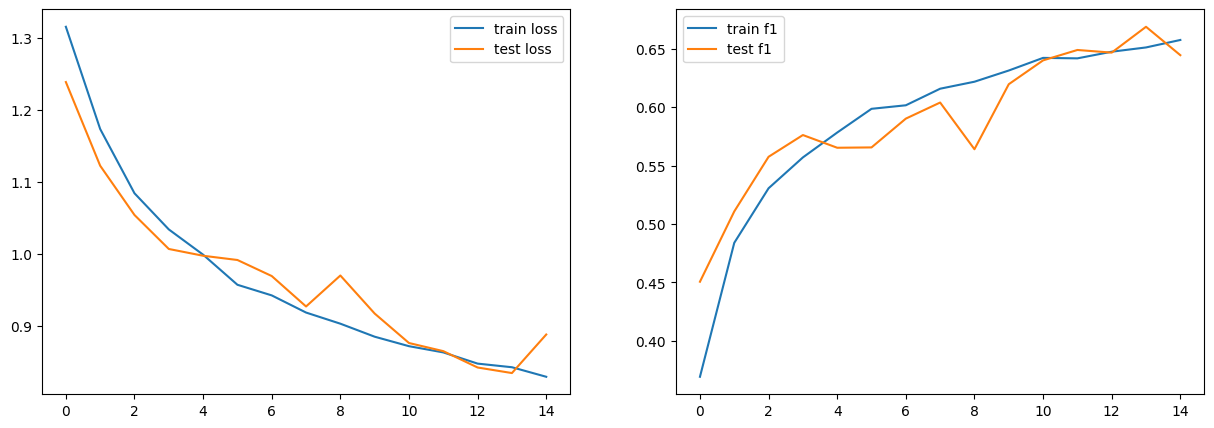

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(p_train_losses, label='train loss')
plt.plot(p_test_losses, label='test loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(p_train_f1s, label='train f1')
plt.plot(p_test_f1s, label='test f1')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

model_p.eval()
all_test_preds = []
all_test_labels = []

with torch.no_grad():
  for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model_p(inputs)
    preds = torch.argmax(outputs, dim=1)
    all_test_preds.extend(preds.cpu().numpy())
    all_test_labels.extend(labels.cpu().numpy())

class_names = list(label2idx.keys())

print(classification_report(all_test_labels, all_test_preds, target_names=class_names,digits=4))

                precision    recall  f1-score   support

     Экономика     0.5990    0.7254    0.6562      1209
         Спорт     0.8867    0.5182    0.6541      1208
      Культура     0.7393    0.6577    0.6961      1186
Интернет и СМИ     0.5022    0.6622    0.5712      1187

      accuracy                         0.6407      4790
     macro avg     0.6818    0.6409    0.6444      4790
  weighted avg     0.6823    0.6407    0.6445      4790



In [ ]:
all_train_preds = []
all_train_labels = []

with torch.no_grad():
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_p(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

print('для train:')
print(classification_report(all_train_labels, all_train_preds, target_names=class_names,digits=4))

для train:
                precision    recall  f1-score   support

     Экономика     0.5886    0.7301    0.6518      4791
         Спорт     0.9039    0.5301    0.6682      4792
      Культура     0.7718    0.6577    0.7102      4814
Интернет и СМИ     0.4932    0.6529    0.5619      4762

      accuracy                         0.6427     19159
     macro avg     0.6894    0.6427    0.6480     19159
  weighted avg     0.6898    0.6427    0.6482     19159



### 5.

<p class="task" id="5"></p>

5\. Повторите решение задачи 3, не замораживая веса слоя эмбеддингов. Сравните качество полученного решения и решений из предыдущих задач, а также время, затраченное на обучения моделей.  

- [ ] Проверено на семинаре

In [ ]:
import torch.nn as nn

class Classifier(nn.Module):
  def __init__(self, embed_matrix, num_classes):
    super().__init__()
    vocab_size, embedding_dim = embed_matrix.shape

    self.embedding = nn.Embedding.from_pretrained(
        torch.FloatTensor(embed_matrix),
        freeze = False, # размораживаем
        padding_idx=0
    )
    self.classifier = nn.Sequential(
        nn.Linear(embedding_dim, 128),
        nn.ReLU(),
        nn.Linear(128, num_classes))

  def forward(self, x):
    embeddings = self.embedding(x)
    doc_embeddings = embeddings.mean(dim=1)
    logits = self.classifier(doc_embeddings)
    return logits

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score

num_classes = len(label2idx)
model_u = Classifier(embed_matrix, num_classes).to(device)

crit = nn.CrossEntropyLoss()
optim = optim.Adam(model_u.parameters(), lr = 0.001)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size)

In [ ]:
num_epochs = 15
u_train_losses = []
u_test_losses = []
u_train_f1s = []
u_test_f1s = []

start_train = time.time()

for epoch in range(num_epochs):
  model_u.train()
  epoch_train_loss = 0
  all_train_preds = []
  all_train_labels = []

  for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    optim.zero_grad()
    outputs = model_u(inputs)
    loss = crit(outputs, labels)
    loss.backward()
    optim.step()

    epoch_train_loss += loss.item()
    preds = torch.argmax(outputs, dim=1)
    all_train_preds.extend(preds.cpu().numpy())
    all_train_labels.extend(labels.cpu().numpy())

  avg_train_loss = epoch_train_loss / len(train_loader)
  train_f1 = f1_score(all_train_labels, all_train_preds, average='macro')

  model_u.eval()
  epoch_test_loss = 0
  all_test_preds = []
  all_test_labels = []

  with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_u(inputs)
        loss = crit(outputs, labels)
        epoch_test_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        all_test_preds.extend(preds.cpu().numpy())
        all_test_labels.extend(labels.cpu().numpy())

  avg_test_loss = epoch_test_loss / len(test_loader)
  test_f1 = f1_score(all_test_labels, all_test_preds, average='macro')

  u_train_losses.append(avg_train_loss)
  u_test_losses.append(avg_test_loss)
  u_train_f1s.append(train_f1)
  u_test_f1s.append(test_f1)


  print(f'Epoch {epoch+1}/{num_epochs}')
  print(f'train loss: {avg_train_loss:.4f} | train f1: {train_f1:.4f}')
  print(f'test loss: {avg_test_loss:.4f} | test f1: {test_f1:.4f}')

u_train_time = time.time() - start_train
print(f"\nВремя обучения: {u_train_time:.2f} сек")

Epoch 1/15
train loss: 0.7313 | train f1: 0.7555
test loss: 0.2257 | test f1: 0.9376
Epoch 2/15
train loss: 0.1147 | train f1: 0.9698
test loss: 0.1293 | test f1: 0.9625
Epoch 3/15
train loss: 0.0377 | train f1: 0.9921
test loss: 0.1126 | test f1: 0.9662
Epoch 4/15
train loss: 0.0154 | train f1: 0.9976
test loss: 0.1082 | test f1: 0.9667
Epoch 5/15
train loss: 0.0078 | train f1: 0.9991
test loss: 0.1108 | test f1: 0.9665
Epoch 6/15
train loss: 0.0050 | train f1: 0.9994
test loss: 0.1139 | test f1: 0.9656
Epoch 7/15
train loss: 0.0037 | train f1: 0.9995
test loss: 0.1167 | test f1: 0.9660
Epoch 8/15
train loss: 0.0031 | train f1: 0.9995
test loss: 0.1200 | test f1: 0.9658
Epoch 9/15
train loss: 0.0026 | train f1: 0.9995
test loss: 0.1241 | test f1: 0.9667
Epoch 10/15
train loss: 0.0023 | train f1: 0.9995
test loss: 0.1258 | test f1: 0.9660
Epoch 11/15
train loss: 0.0021 | train f1: 0.9995
test loss: 0.1285 | test f1: 0.9658
Epoch 12/15
train loss: 0.0019 | train f1: 0.9995
test loss: 0.

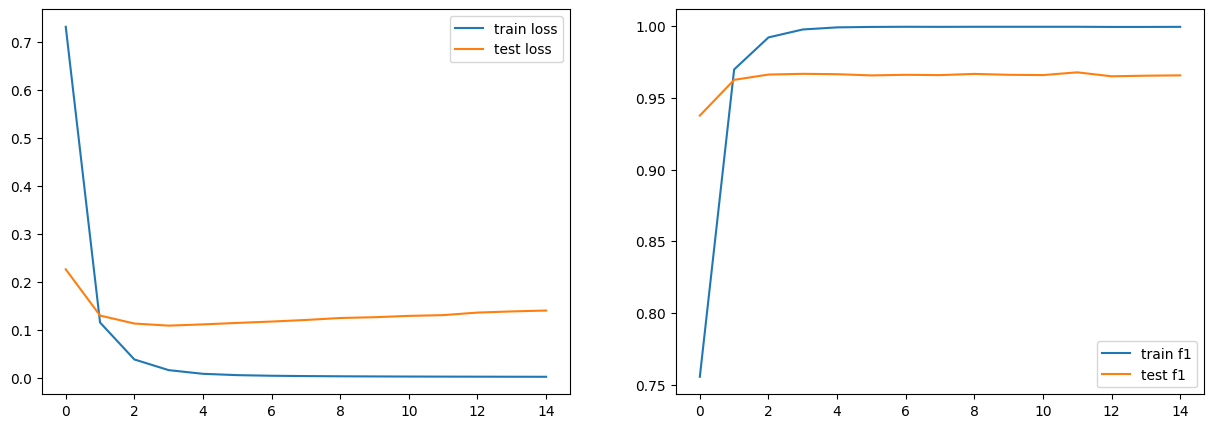

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(u_train_losses, label='train loss')
plt.plot(u_test_losses, label='test loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(u_train_f1s, label='train f1')
plt.plot(u_test_f1s, label='test f1')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

model_u.eval()
all_test_preds = []
all_test_labels = []

with torch.no_grad():
  for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model_u(inputs)
    preds = torch.argmax(outputs, dim=1)
    all_test_preds.extend(preds.cpu().numpy())
    all_test_labels.extend(labels.cpu().numpy())

class_names = list(label2idx.keys())

print(classification_report(all_test_labels, all_test_preds, target_names=class_names,digits=4))

                precision    recall  f1-score   support

     Экономика     0.9551    0.9669    0.9610      1209
         Спорт     0.9908    0.9851    0.9880      1208
      Культура     0.9682    0.9764    0.9723      1186
Интернет и СМИ     0.9487    0.9343    0.9414      1187

      accuracy                         0.9658      4790
     macro avg     0.9657    0.9657    0.9657      4790
  weighted avg     0.9658    0.9658    0.9657      4790



In [ ]:
all_train_preds = []
all_train_labels = []

with torch.no_grad():
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_u(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

print('для train:')
print(classification_report(all_train_labels, all_train_preds, target_names=class_names,digits=4))

для train:
                precision    recall  f1-score   support

     Экономика     0.9983    0.9998    0.9991      4791
         Спорт     1.0000    1.0000    1.0000      4792
      Культура     1.0000    0.9992    0.9996      4814
Интернет и СМИ     0.9998    0.9992    0.9995      4762

      accuracy                         0.9995     19159
     macro avg     0.9995    0.9995    0.9995     19159
  weighted avg     0.9995    0.9995    0.9995     19159



#### Сравнение результатов:

In [ ]:
print(f"Время обучения первой модели: {first_train_time:.2f} сек")

Время обучения первой модели: 127.28 сек


In [ ]:
print(f"Время обучения модели с замороженными весами: {p_train_time:.2f} сек")

Время обучения модели с замороженными весами: 67.02 сек


In [ ]:
print(f"Время обучения модели с размороженными весами: {u_train_time:.2f} сек")

Время обучения модели с размороженными весами: 147.40 сек


Итог обучения 1 модели:
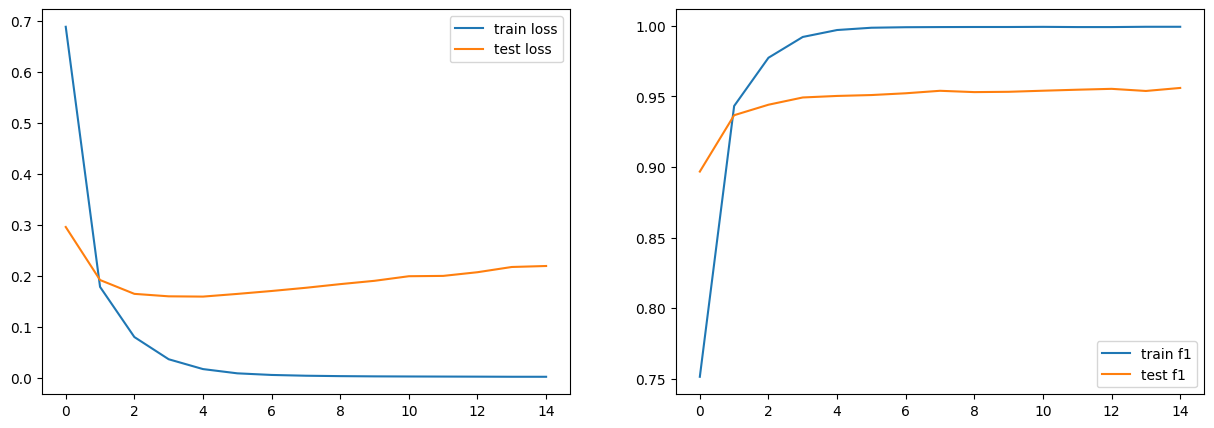

Итог обучения модели с замороженными весами:
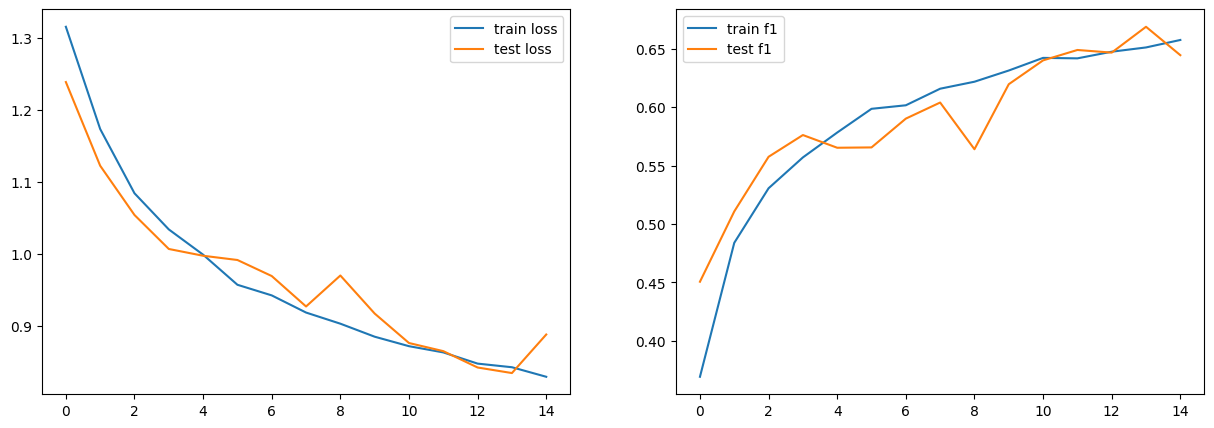

Итог обучения модели с размороженными весами:
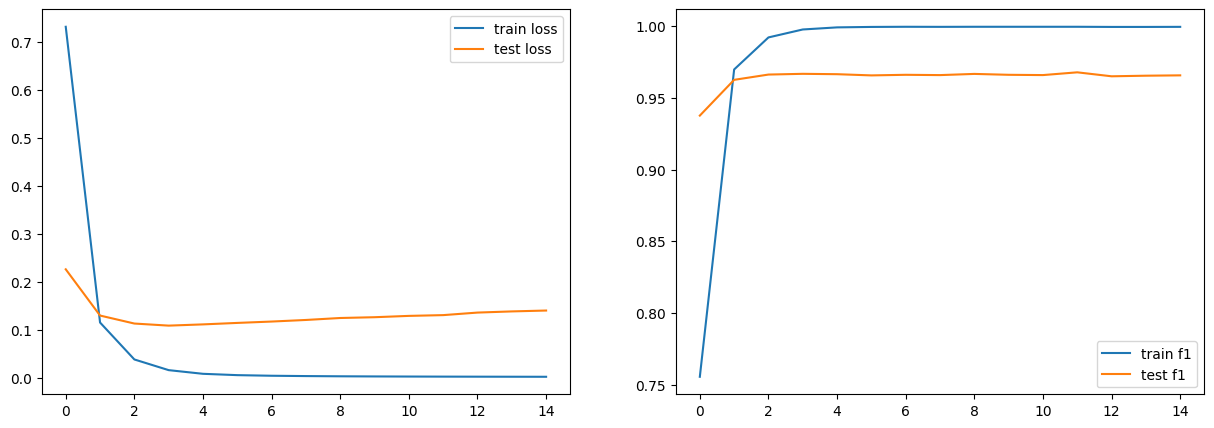

classification report для 1 модели:

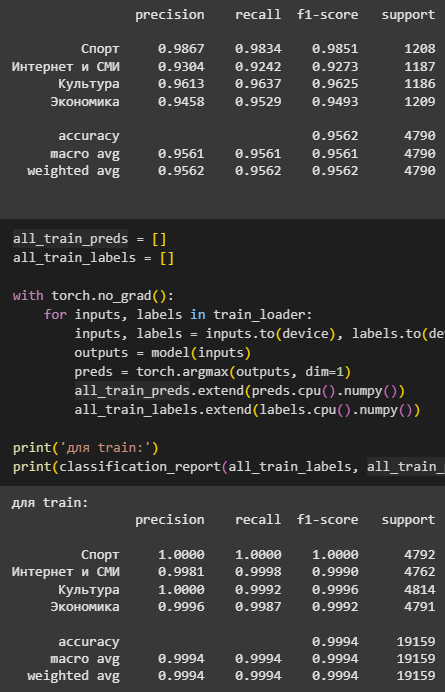

classification report для модели с замороженными весами:

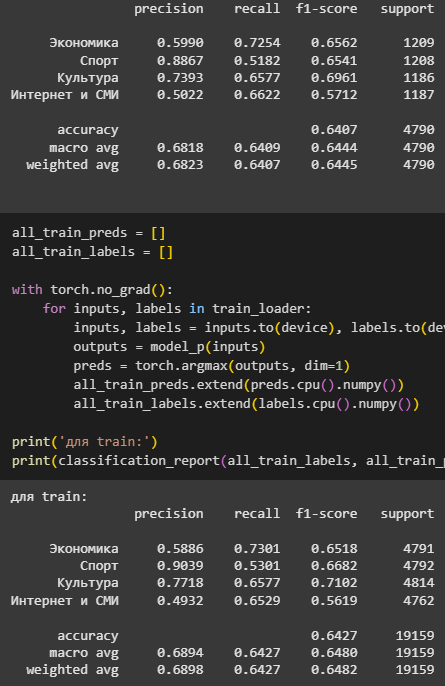

classification report для модели с размороженными весами:

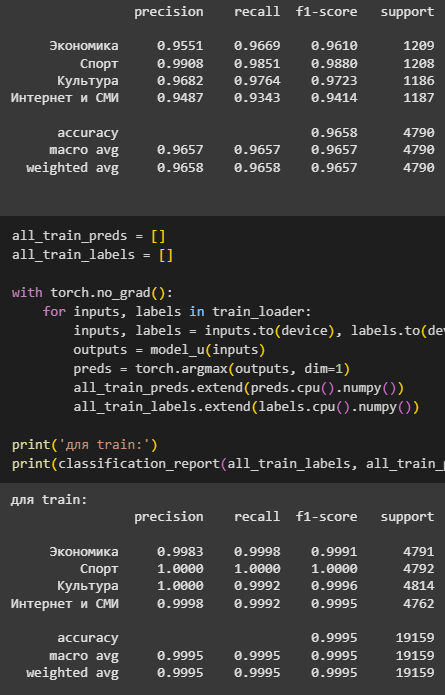

### 6.

<p class="task" id="6"></p>

6\. Воспользовавшись обученной моделью из предыдущей задачи, визуализируйте эмбеддинги новостей из тестовой выборки в двумерном пространстве. Для проекции точек в двумерное пространство воспользуйтесь алгоритмом t-SNE. Раскрасьте точки в цвет, соответствующий классу новости.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.manifold import TSNE

model_u.eval()
all_embeds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader: # извлек эмбед и метки из тест
        inputs = inputs.to(device)
        embeddings = model_u.embedding(inputs)  # b x s x e
        doc_embeds = embeddings.mean(dim=1)  # b x e
        all_embeds.append(doc_embeds.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

all_embeds = np.concatenate(all_embeds)
all_labels = np.concatenate(all_labels)

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000) # уменьш до 2р
embeds_2d = tsne.fit_transform(all_embeds)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


<ipython-input-81-6c94476ae595>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(class_names))


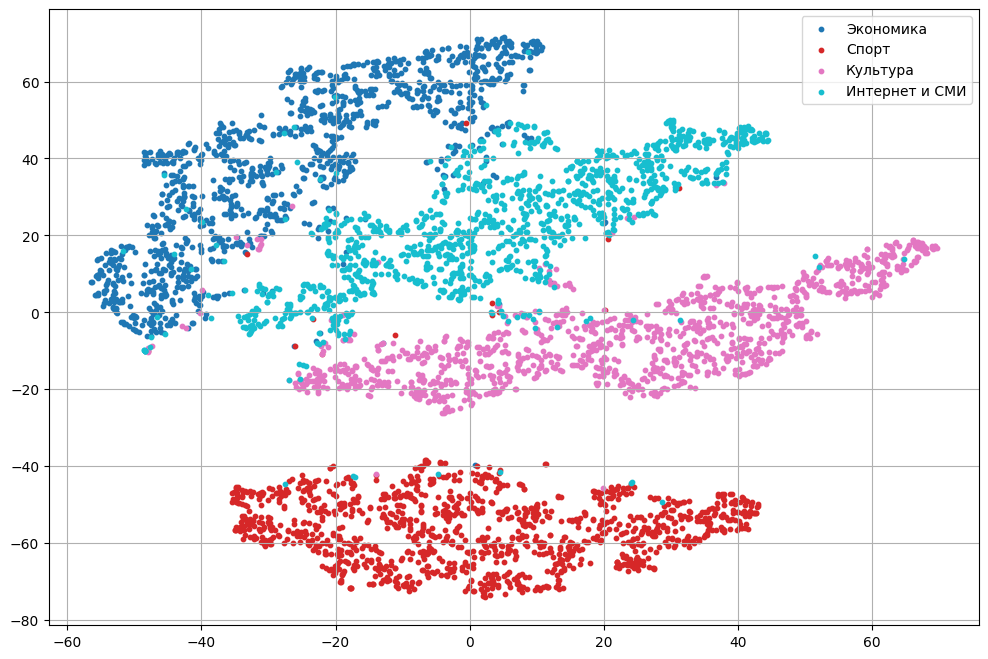

In [ ]:
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', len(class_names))

for i, class_name in enumerate(class_names):
    mask = all_labels == i
    plt.scatter(embeds_2d[mask, 0], embeds_2d[mask, 1], color=colors(i), label=class_name, s=10)

plt.legend()
plt.grid(True)
plt.show()